In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [2]:
x_train = pd.read_csv('XTRAIN2.csv')
x_test = pd.read_csv('XTEST2.csv')
y_train = pd.read_csv('YTRAIN2.csv')
y_test = pd.read_csv('YTEST2.csv')

y_test = y_test.values.ravel()
y_train = y_train.values.ravel()

## **Using Class A Features**


In [3]:
classAFeatures=['HForm', 'AForm', 'HSt', 'ASt', 'HSTKPP', 'ASTKPP', 'HGKPP', 'AGKPP', 'HCKPP', 'ACKPP', 
                'HAttack', 'AAttack', 'HMidField', 'AMidField', 'HDefence', 'ADefence', 'HOverall', 'AOverall', 
                'HTGD', 'ATGD', 'HStWeighted', 'AStWeighted']

x_train_A = x_train[classAFeatures]
x_test_A = x_test[classAFeatures]                

Initial Cross Val Accuracy

In [4]:
xgb_clf = xgb.XGBClassifier()
cv_scores = cross_val_score(xgb_clf, x_train_A, y_train, cv = 10)
print('Validation Accuracy: ' + str(cv_scores.mean()))

Validation Accuracy: 0.48103610978256867


Test Accuracy

In [5]:
xgb_clf.fit(x_train_A, y_train)
y_predicted = xgb_clf.predict(x_test_A)
print ("Test Accuracy: " + str(accuracy_score(y_test, y_predicted)))

Test Accuracy: 0.528125


Using GridSearch

In [7]:
parameters = { 'learning_rate' : [0.01, 0.025, 0.05, 0.1],
               'gamma' : [0.01, 0.05, 0.1, 0.2, 0.5],
               'reg_lambda' : [0.01, 0.075, 0.1, 0.2, 10], 
               'reg_alpha' : [0.05, 0.1, 0.2, 10], 
               'max_depth' : [3, 6, 9, 12, 15, 18],
               'objective' : ['multi:softprob']
              }
grid_rf = GridSearchCV(xgb_clf, parameters, n_jobs = -1, verbose = 2, scoring = 'accuracy')
grid_rf.fit(x_train_A, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 42.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 50.3min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 59.6min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 62.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n...
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'learning_rate': [0.01, 

In [8]:
print('Best Score: ' + str(grid_rf.best_score_))
print('Best Set of Estimators: ' + str(grid_rf.best_estimator_))

Best Score: 0.5351751637710054
Best Set of Estimators: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.05,
              reg_lambda=0.2, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Using this set of params to tune the model

In [6]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0.05,
              reg_lambda=0.2, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
n_instances = dict(zip(unique_elements, counts_elements))
wt_vec = [0]*len(y_train)
least = min(counts_elements)
for i in range(0, len(y_train)):
    wt_vec[i] = (least / n_instances[y_train[i]])

xgb_clf.fit(x_train_A, y_train, sample_weight = wt_vec)

y_predicted = xgb_clf.predict(x_test_A)
print('Test Accuracy: ' + str(accuracy_score(y_test, y_predicted)))

labels=['H','A','D']
confusionMatrix = confusion_matrix(y_test, y_predicted, labels)
print(confusionMatrix)
print(classification_report(y_test, y_predicted, labels))

Test Accuracy: 0.5453125
[[182  61  65]
 [ 31 119  24]
 [ 65  45  48]]
              precision    recall  f1-score   support

           H       0.65      0.59      0.62       308
           A       0.53      0.68      0.60       174
           D       0.35      0.30      0.33       158

    accuracy                           0.55       640
   macro avg       0.51      0.53      0.51       640
weighted avg       0.55      0.55      0.54       640



# RPS Value

In [7]:
prob_pred = xgb_clf.predict_proba(x_test_A)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_predicted), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):        
        sum1=0
        
        for i in range(0, r):            
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1
            
            for j in range(0, i):
                sum2 += p[x][j]-obs[j]
                
            sum1 += sum2**2            
        rps.append(sum1/(r-1))
        
    #print(rps)
    
    #print('RPS:' + str(sum(rps)/n))
    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.1951880560993074


Graphs

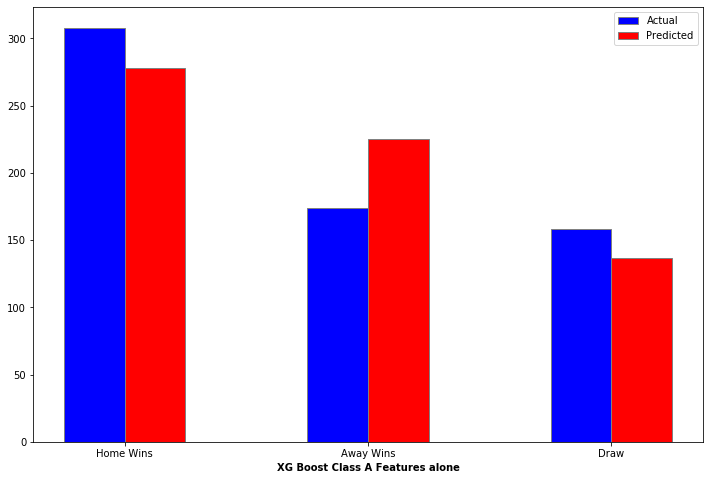

In [8]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
    if(i=='H'):
        Home+=1;
    elif(i=='A'):
        Away+=1;
    else:
        Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

Predicted=[]
PHome=PAway=PDraw=0
for i in y_predicted:
    if(i=='H'):
        PHome+=1;
    elif(i=='A'):
        PAway+=1;
    else:
        PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 

# Adding Xticks
plt.xlabel('XG Boost Class A Features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")
plt.show()

## **Using Class B Features**

In [9]:
classBFeatures=['FormDifferential', 'StDifferential', 'STKPP', 'GKPP', 'CKPP', 
                'RelAttack', 'RelMidField', 'RelDefence', 'RelOverall', 
                'GDDifferential', 'StWeightedDifferential']

x_train_B = x_train[classBFeatures]
x_test_B = x_test[classBFeatures]                

Initial Cross Val Accuracy

In [10]:
xgb_clf = xgb.XGBClassifier()
cv_scores = cross_val_score(xgb_clf, x_train_B, y_train, cv = 10)
print('Validation Accuracy: ' + str(cv_scores.mean()))

Validation Accuracy: 0.4792974458261286


Test Accuracy

In [11]:
xgb_clf.fit(x_train_B, y_train)
y_predicted = xgb_clf.predict(x_test_B)
print ("Test Accuracy: " + str(accuracy_score(y_test, y_predicted)))

Test Accuracy: 0.5328125


Using Grid Search

In [11]:
parameters = { 'learning_rate' : [0.01, 0.025, 0.05, 0.1],
               'gamma' : [0.01, 0.05, 0.1, 0.2, 0.5],
               'reg_lambda' : [0.01, 0.075, 0.1, 0.2, 10], 
               'reg_alpha' : [0.05, 0.1, 0.2, 10], 
               'max_depth' : [3, 6, 9, 12, 15, 18],
               'objective' : ['multi:softprob']
              }
grid_rf = GridSearchCV(xgb_clf, parameters, n_jobs = -1, verbose = 2, scoring = 'accuracy')
grid_rf.fit(x_train_B, y_train)

D:\Tools\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed: 47.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n...
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0.01, 0.05, 0.1, 0.2, 0.5],
                         'learning_rate': [0.01, 

In [12]:
print('Best Score: ' + str(grid_rf.best_score_))
print('Best Set of Estimators: ' + str(grid_rf.best_estimator_))

Best Score: 0.5365992594702363
Best Set of Estimators: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=10, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Using this set of params to tune the model and Class B Features to train it

In [12]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.025, max_delta_step=0, max_depth=3,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=10, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
n_instances = dict(zip(unique_elements, counts_elements))
wt_vec = [0]*len(y_train)
least = min(counts_elements)
for i in range(0, len(y_train)):
    wt_vec[i] = (least / n_instances[y_train[i]])

xgb_clf.fit(x_train_B, y_train, sample_weight = wt_vec)

y_predicted = xgb_clf.predict(x_test_B)
print('Test Accuracy: ' + str(accuracy_score(y_test, y_predicted)))

labels=['H','A','D']
confusionMatrix = confusion_matrix(y_test, y_predicted, labels)
print(confusionMatrix)
print(classification_report(y_test, y_predicted, labels))

Test Accuracy: 0.5015625
[[146  44 118]
 [ 14 106  54]
 [ 42  47  69]]
              precision    recall  f1-score   support

           H       0.72      0.47      0.57       308
           A       0.54      0.61      0.57       174
           D       0.29      0.44      0.35       158

    accuracy                           0.50       640
   macro avg       0.52      0.51      0.50       640
weighted avg       0.56      0.50      0.52       640



# RPS Value

In [13]:
prob_pred = xgb_clf.predict_proba(x_test_B)

def RPS(p, e, r):
    m = dict(zip(np.unique(y_predicted), [0, 1, 2]))
    n = len(p)
    rps = []
    for x in range(n):        
        sum1=0
        
        for i in range(0, r):            
            sum2=0
            obs = [0]*r
            obs[m[e[x]]] = 1
            
            for j in range(0, i):
                sum2 += p[x][j]-obs[j]
                
            sum1 += sum2**2            
        rps.append(sum1/(r-1))
        
    #print(rps)

    print(np.mean(rps))
RPS(prob_pred, y_test, 3)

0.20014997412510954


Graphs

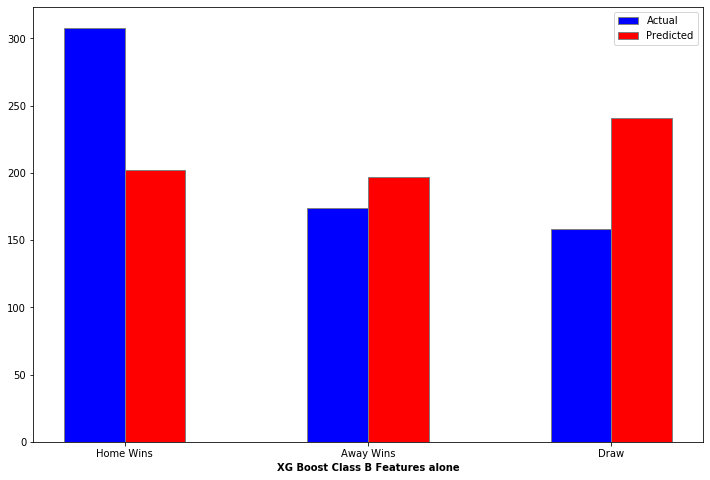

In [14]:
Actual=[]
Home=Away=Draw=0
for i in y_test:
    if(i=='H'):
        Home+=1;
    elif(i=='A'):
        Away+=1;
    else:
        Draw+=1;
Actual.append(Home)
Actual.append(Away)
Actual.append(Draw)

Predicted=[]
PHome=PAway=PDraw=0
for i in y_predicted:
    if(i=='H'):
        PHome+=1;
    elif(i=='A'):
        PAway+=1;
    else:
        PDraw+=1;
Predicted.append(PHome)
Predicted.append(PAway)
Predicted.append(PDraw)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 

# Make the plot 
plt.bar(br1, Actual, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Actual') 
plt.bar(br2, Predicted, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Predicted') 

# Adding Xticks
plt.xlabel('XG Boost Class B Features alone', fontweight ='bold') 
plt.ylabel('', fontweight ='bold') 
plt.xticks([r + barWidth/2 for r in range(len(Actual))], 
           ['Home Wins', 'Away Wins', 'Draw']) 
plt.legend(loc="upper right")
plt.show()